# Exercise 02

## Time Series Analysis

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# Integrantes

* Juan Sebastian Rincón H. - 201214767
* Angie Paola Chacón - 201012536
* Alexander Camargo - 200911325
* Juan Fernando Ortiz - 200623117

# 02.1 Find the values of rho for which a series becomes non-stationary. rho between 0 and 1 ([0,1]) \n",
`X(t) = Rho * X(t-1) + Er(t)`

# Insumos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [2]:
def ts(rho):
    ts = pd.Series(np.random.rand(200) - 0.5, index=pd.date_range("2020-01-01", periods=200))
    
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]  
        
    return ts

# Solución

In [4]:
rho_values=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1,1.1,1.2,1.3]

for i in rho_values:
        ts1 = ts(rho=i)
        
        result=adfuller(ts1)
        
        print("rho="+str(i))
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))
        print()

rho=0
ADF Statistic: -6.417860
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575

rho=0.1
ADF Statistic: -11.148894
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575

rho=0.2
ADF Statistic: -12.069410
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575

rho=0.3
ADF Statistic: -6.162673
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575

rho=0.4
ADF Statistic: -8.743542
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575

rho=0.5
ADF Statistic: -8.353792
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575

rho=0.6
ADF Statistic: -5.438173
p-value: 0.000003
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575

rho=0.7
ADF Statistic: -2.926347
p-value: 0.042369
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575

rho=0.8
ADF Statistic: -5.195521
p-value: 0.000009
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575

rho=0.9
ADF Statistic: -2.182398
p-value: 0.21

### *Conclusión* 
Es posible concluir que rechazamos la hipótesis nula de estacionareidad de la serie cuando los valores de rho son muy cercanos, iguales o mayores que uno.

# 02.2 Download and explore two series from google trends

- Figure PM
- Figure DIFF
- Figure Seasonality
- Figure AC

# Importación

In [5]:
df=pd.read_csv("Hotels.csv",sep=",")
df.columns=["Date","Hotels","Holidays"]

In [6]:
df.head()

,Date,Hotels,Holidays
0,2004-01,88,31
1,2004-02,89,25
2,2004-03,86,23
3,2004-04,85,24
4,2004-05,84,26


In [7]:
df.set_index('Date', inplace=True)
df.head()

,Hotels,Holidays
Date,,
2004-01,88,31
2004-02,89,25
2004-03,86,23
2004-04,85,24
2004-05,84,26


# Grafica de Series

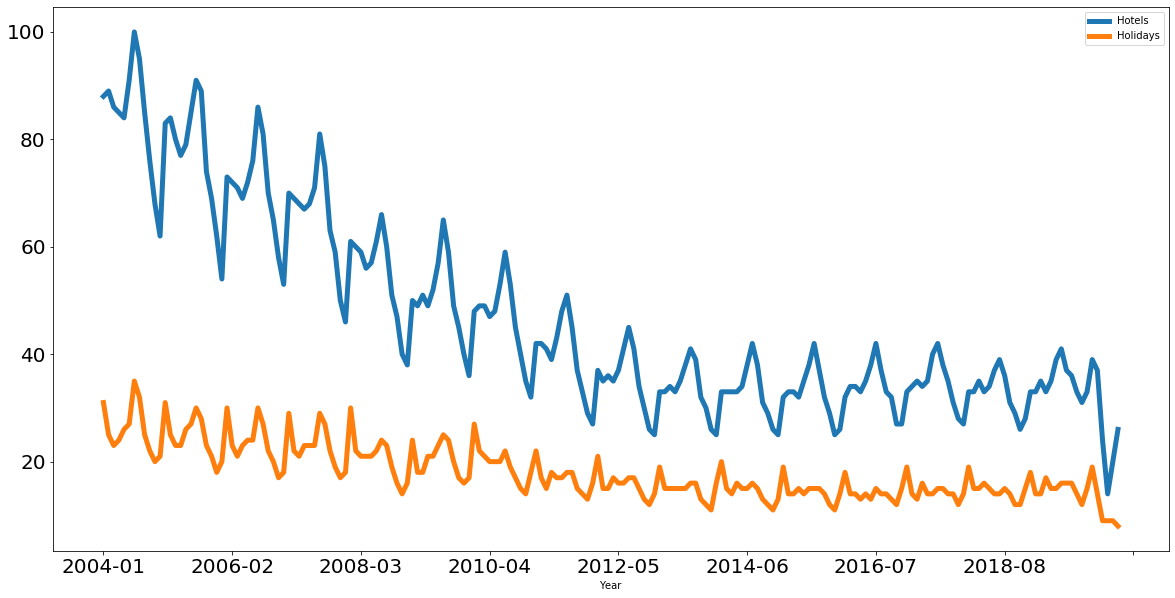

In [8]:
df[['Hotels', 'Holidays']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year',fontsize=10);

## Prueba de Dickey-Fuller

In [9]:
result = adfuller(df['Hotels'])

print("Hotels")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Hotels
ADF Statistic: -2.151673
p-value: 0.224250
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


In [10]:
result = adfuller(df['Holidays'])

print("Holidays")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Holidays
ADF Statistic: -1.081932
p-value: 0.722223
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


## Conclusiones
De acuerdo con los resultados de la prueba Dickey-Fuller, se puede concluir a un nivel de confianza del 95% que las series de hotels y Holidays no son estacionarias, dado que se rechaza la hipótesis nula. 

## Gráfica de Autocorrelaciones

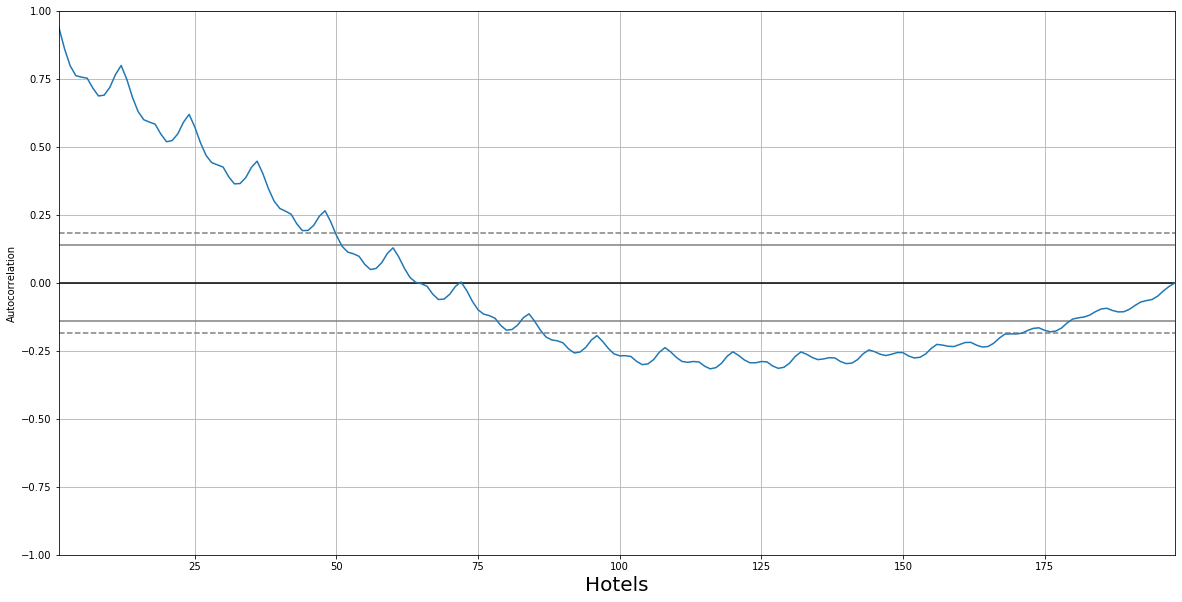

In [11]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(df["Hotels"])
plt.xlabel('Hotels',fontsize=20);

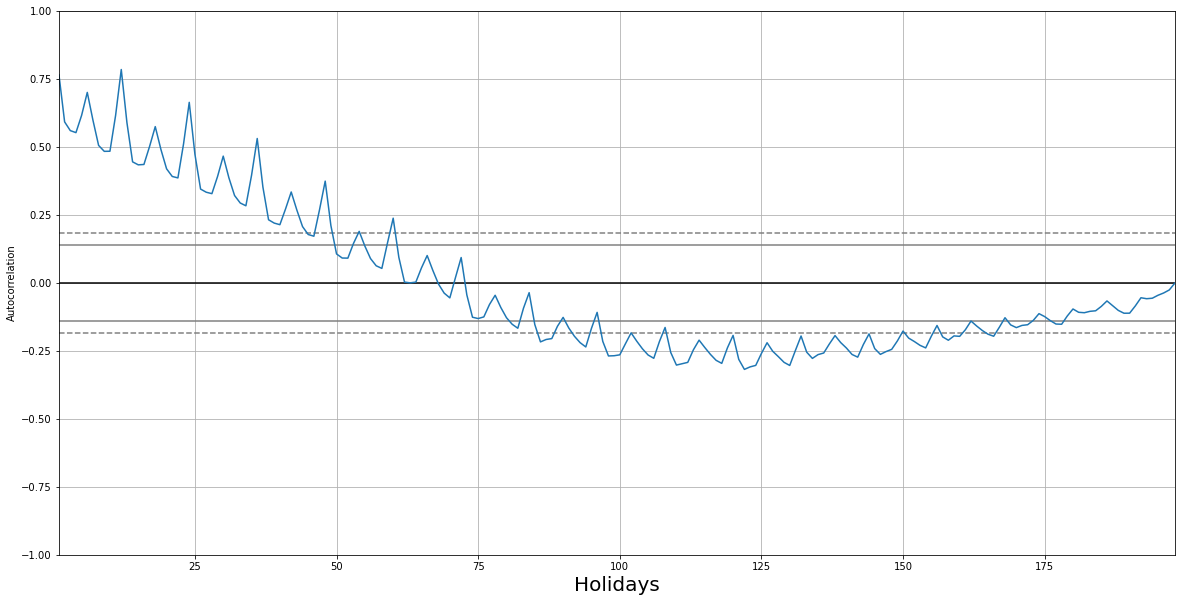

In [36]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(df["Holidays"])
plt.xlabel('Holidays',fontsize=20);

In [50]:
df.corr()

,Hotels,Holidays
Hotels,1.00000,0.90089
Holidays,0.90089,1.00000


## Conclusiones

Se puede concluir que la correlación entre las series de Holidays y Hotels es positiva y significativa. Por lo anterior, podemos decir que la tendencia positiva/negativa de una ayuda a entender el comportamiento posible de la otra (siempre en la misma dirección). 

# Gráfica de Media Móvil

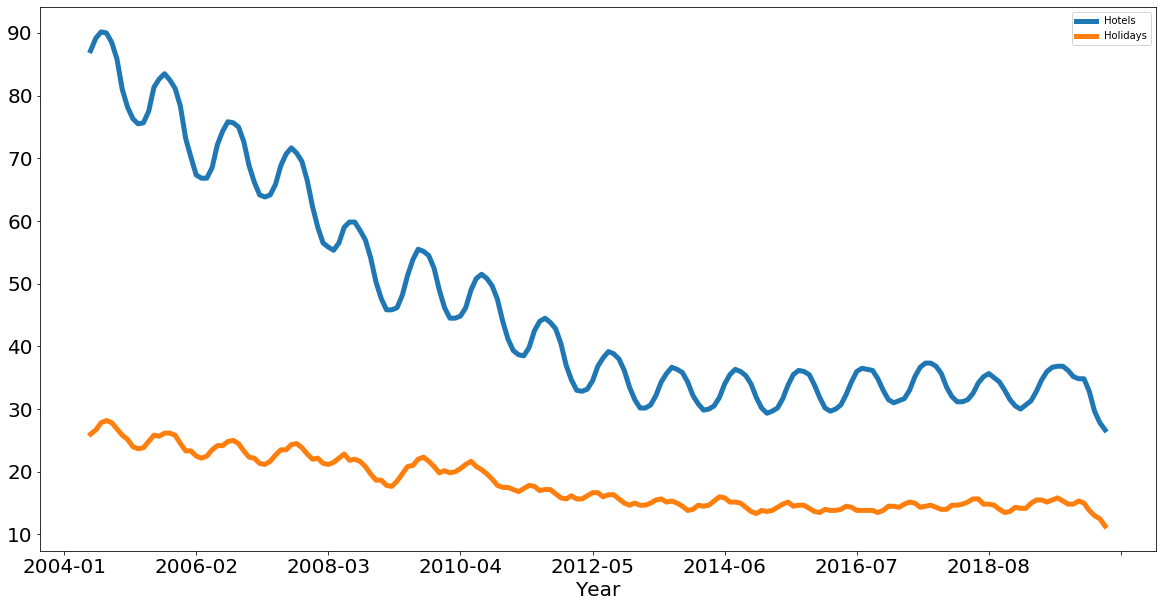

In [12]:
df[['Hotels', 'Holidays']].rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

# Gráfica de Diferencia

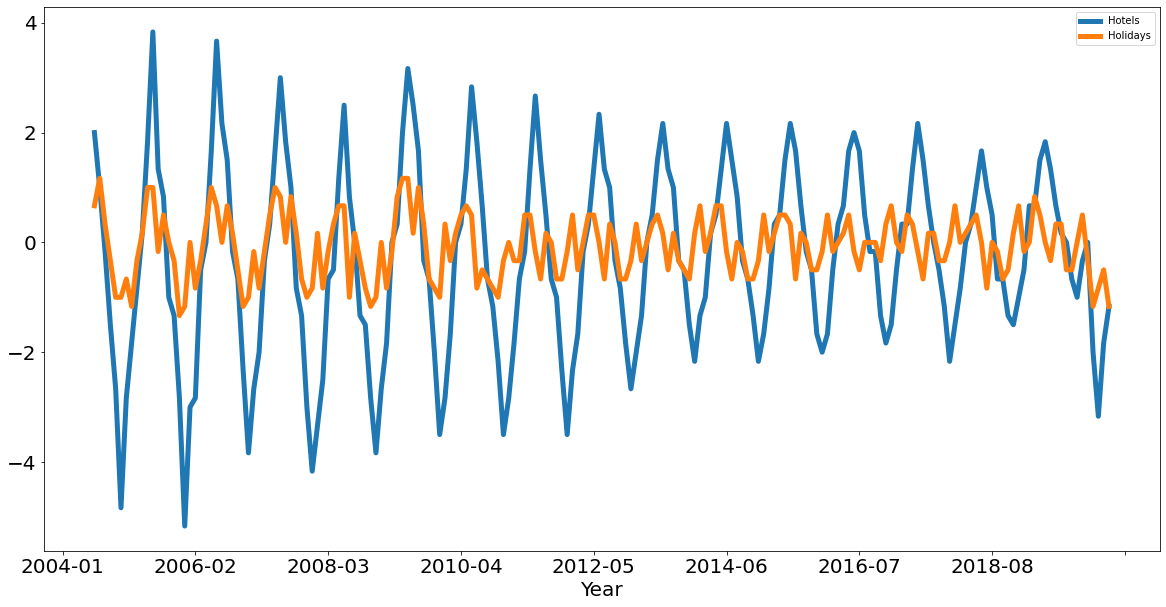

In [27]:
df[['Hotels', 'Holidays']].rolling(6).mean().diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

## Prueba de Dickey-Fuller de series diferenciadas

In [42]:
result = adfuller(df['Hotels'].diff().iloc[1:])

print("Hotels")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Hotels
ADF Statistic: -2.728841
p-value: 0.069179
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


In [38]:
result = adfuller(df['Holidays'].diff().iloc[1:])

print("Holidays")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Holidays
ADF Statistic: -3.404509
p-value: 0.010806
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


## Conclusiones
De acuerdo con los resultados de la prueba Dickey-Fuller, se puede concluir a un nivel de confianza del 95% que la serie de  Holidays es estacionaria, dado que no hay suficiente evidencia estadística para rechazar la hipótesis nula. Mientras que la serie de Hotels a un nivel de confianza del 95% no logra cumplir con el valor crítico requerido, sin embargo, a un nivel de confianza del 90% si puede considerarse estacionara. Por lo tanto, es posible que se requiera hacer una segunda diferencia a la serie de hotels o trabajar minuciosamente con estos resultados.

## Gráfica de Autocorrelaciones

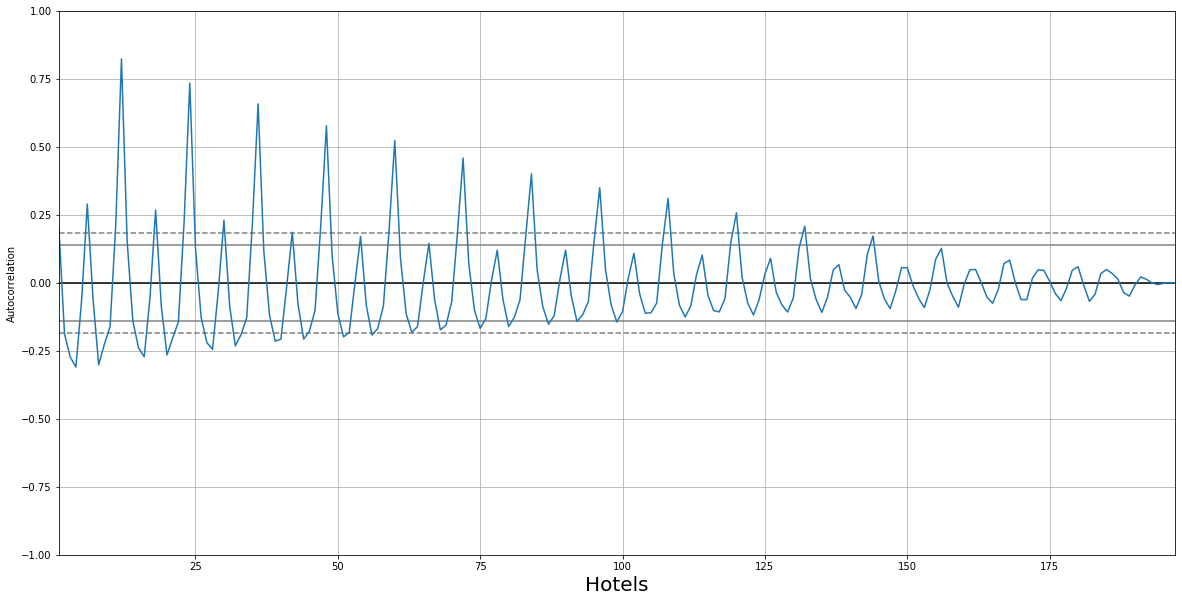

In [13]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(df["Hotels"].diff().iloc[1:])
plt.xlabel('Hotels',fontsize=20);

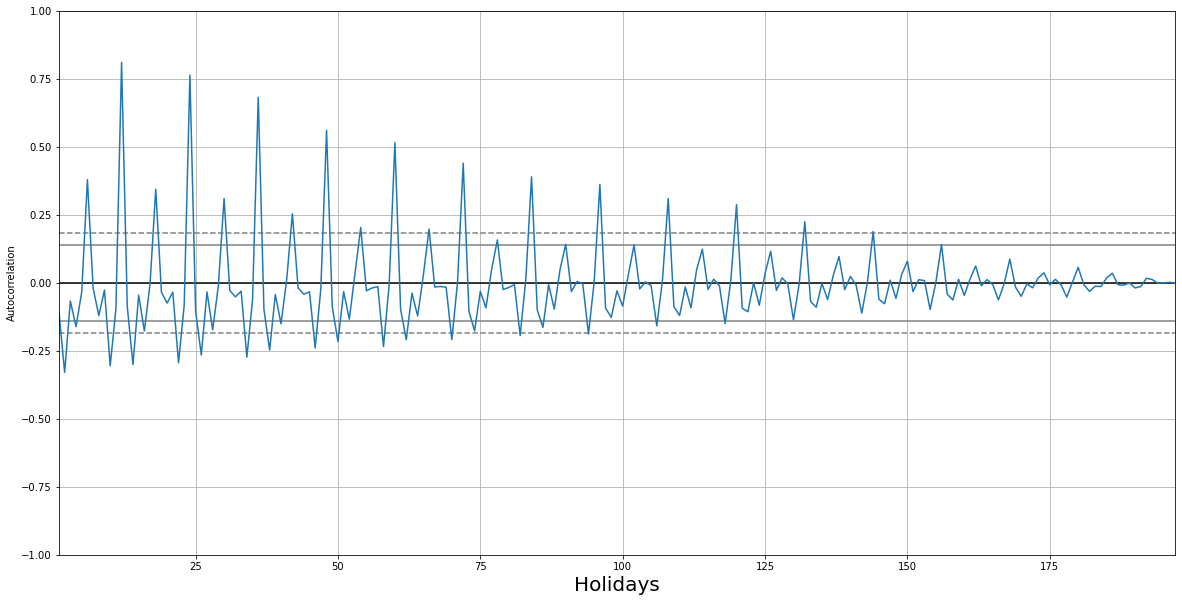

In [48]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(df["Holidays"].diff().iloc[1:])
plt.xlabel('Holidays',fontsize=20);

## Correlación entre series diferenciadas

In [14]:
df.diff().corr()

,Hotels,Holidays
Hotels,1.000000,0.672955
Holidays,0.672955,1.000000


Al realizar la correlación entre las series ya estacionarias, se puede concluir que se mantiene la correlación positiva entre ambas, a pesar de que no sea tan alta como al principio. 